# ParkSense: Exploratory Data Analysis (EDA)

**Goal**: Visualize parking trends to understand user behavior and identify key features for our model.

**Key Questions**:
1.  **When is it busy?** (Occupancy vs Time)
2.  **Where is it busy?** (Geospatial Hotspots)
3.  **How long do people stay?** (Duration Distribution)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Processed Data

In [2]:
DATA_PATH = '../data/processed_parking_data.csv'
df = pd.read_csv(DATA_PATH)
print(f"Data loaded: {df.shape}")
df.head()

Data loaded: (4032, 30)


,DeviceId,Arrival_Time,Departure_Time,DurationMinutes,StreetMarker,SignPlateID,Sign,AreaName,StreetId,StreetName,...,Latitude,Longitude,RoadSegmentDescription,hour,day_of_week,is_weekend,duration_min,is_free_15m,is_free_30m,is_free_45m
0,24183,2019-09-28 21:12:35,2019-09-28 21:40:37,28,12813S,NaN,NaN,Drummond,1102,PELHAM STREET,...,-37.811834,144.975852,St Andrews Place between Lansdowne Street and ...,21,5,1,28.033333,0,1,1
1,24183,2019-11-29 00:00:00,2019-11-29 07:30:00,450,12813S,NaN,NaN,Drummond,1102,PELHAM STREET,...,-37.811834,144.975852,St Andrews Place between Lansdowne Street and ...,0,4,0,450.000000,0,0,0
2,24183,2019-10-03 14:57:57,2019-10-03 18:30:00,213,12813S,217.0,2P M-F 7:30-18:30,Drummond,1102,PELHAM STREET,...,-37.811834,144.975852,St Andrews Place between Lansdowne Street and ...,14,3,0,212.050000,0,0,0
3,24183,2019-10-18 10:01:15,2019-10-18 11:26:18,85,12813S,217.0,2P M-F 7:30-18:30,Drummond,1102,PELHAM STREET,...,-37.811834,144.975852,St Andrews Place between Lansdowne Street and ...,10,4,0,85.050000,0,0,0
4,24183,2019-08-23 13:03:24,2019-08-23 14:23:05,80,12813S,217.0,2P M-F 7:30-18:30,Drummond,1102,PELHAM STREET,...,-37.811834,144.975852,St Andrews Place between Lansdowne Street and ...,13,4,0,79.683333,0,0,0


## 2. Occupancy Trends by Hour
We count the number of **Arrivals** per hour to see when the city is busiest.
*Note: This shows when cars *arrive*, which correlates strongly with occupancy.*

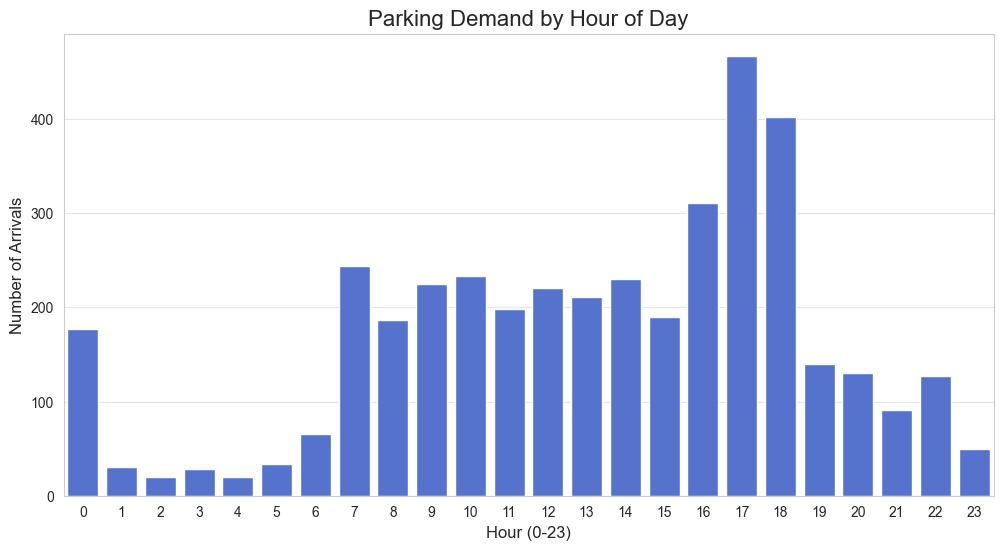

In [3]:
hourly_counts = df.groupby('hour').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='royalblue')
plt.title('Parking Demand by Hour of Day', fontsize=16)
plt.xlabel('Hour (0-23)', fontsize=12)
plt.ylabel('Number of Arrivals', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

**Observation**:
5 PM Rush: The biggest spike in arrivals is at 17:00.

## 3. Geospatial Hotspots
Where are the parking bays located? We'll plot them on a scatter chart.

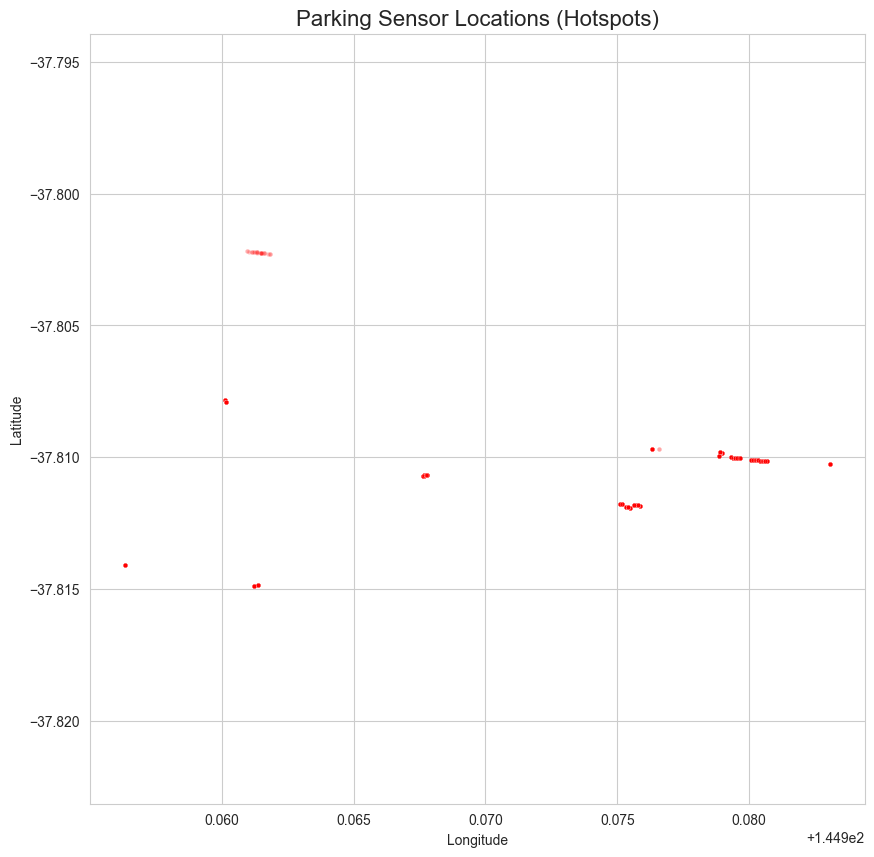

In [4]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Longitude', y='Latitude', alpha=0.1, color='red', s=10)
plt.title('Parking Sensor Locations (Hotspots)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Set axis limits to CBD area to remove outliers if necessary
plt.axis('equal')
plt.show()

## 4. Stay Duration
How long do people usually park? This helps decide our lookahead window.

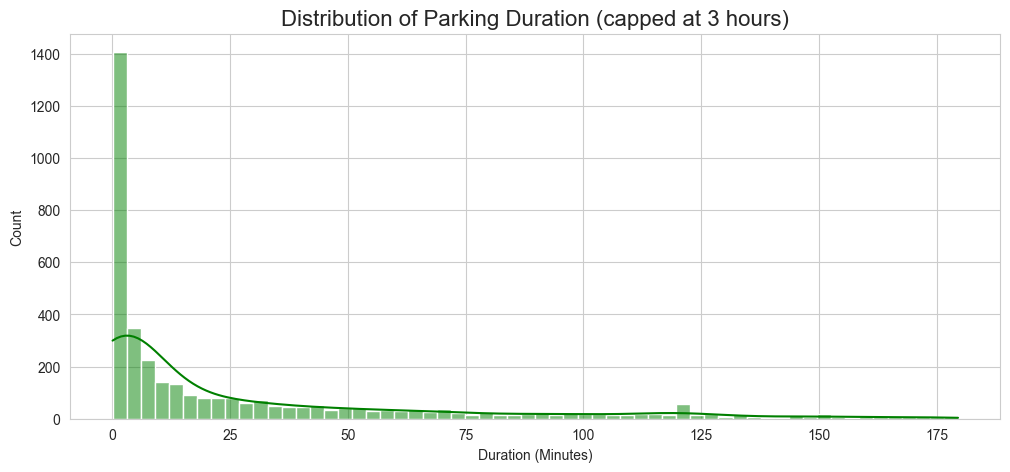

In [5]:
plt.figure(figsize=(12, 5))
# Cap at 180 mins for better visualization
sns.histplot(df[df['duration_min'] < 180]['duration_min'], bins=60, kde=True, color='green')
plt.title('Distribution of Parking Duration (capped at 3 hours)', fontsize=16)
plt.xlabel('Duration (Minutes)')
plt.show()

Short Stays: Most people park for less than 15 minutes (delivery/pickup behavior).

## 5. Target Variable Balance
For `is_free_15m` prediction, do we have enough 0s and 1s?

Target Balance (is_free_15m):
is_free_15m
1    0.558532
0    0.441468
Name: proportion, dtype: float64


C:\Users\hsueh\AppData\Local\Temp\ipykernel_11996\3366099963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


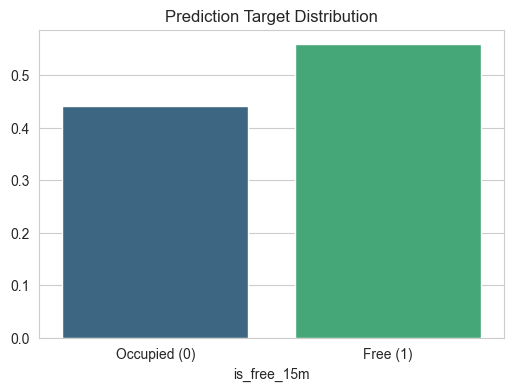

In [6]:
counts = df['is_free_15m'].value_counts(normalize=True)
print("Target Balance (is_free_15m):")
print(counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xticks([0, 1], ['Occupied (0)', 'Free (1)'])
plt.title('Prediction Target Distribution')
plt.show()

Balanced Data: We have a good mix of "Free" and "Occupied" labels (~55/45 split), which is great for training.